# 3. Graph - Sequential Graph
Let's learn how to create and handle multiple nodes in langgraph

In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [15]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [35]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state["name"]}!"
    return state

In [36]:
def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state['final'] + f" You are {state['age']} years old!"

    return state

In [37]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

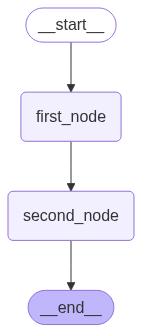

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
result = app.invoke({"name": "Charlie", "age": 20})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie! You are 20 years old!'}


# Exercise

In [53]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [54]:
class MyAgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    final: str

In [76]:
def my_first_node(state: MyAgentState) -> MyAgentState:
    state['final'] = f"{state['name']}, welcome to the system!"
    return state

In [77]:
def my_second_node(state: MyAgentState) -> MyAgentState:
    state['final'] = state['final'] + f" You are {state['age']} years odl!"
    return state

In [88]:
 def my_third_node(state: MyAgentState) -> MyAgentState:
     skills_str = ", ".join(state['skills'])
     state['final'] = state['final'] + f" You have skills in: {skills_str}"
     return state

In [89]:
graph = StateGraph(MyAgentState)
graph.add_node("my_first_node", my_first_node)
graph.add_node("my_second_node", my_second_node)
graph.add_node("my_third_node", my_third_node)
graph.set_entry_point("my_first_node")
graph.add_edge("my_first_node", "my_second_node")
graph.add_edge("my_second_node", "my_third_node")
graph.set_finish_point("my_third_node")
app = graph.compile()

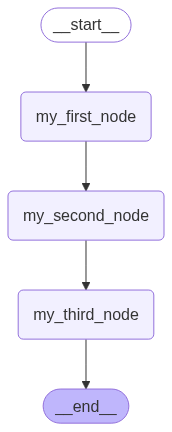

In [90]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [91]:
result = app.invoke({"name": "Ali", "age": "23", "skills": ["Python", "Machine Learning", "LangGraph"]})

In [92]:
print(result)

{'name': 'Ali', 'age': '23', 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final': 'Ali, welcome to the system! You are 23 years odl! You have skills in: Python, Machine Learning, LangGraph'}
